# TF Linear Regression

## learning to fit a regression line to million points

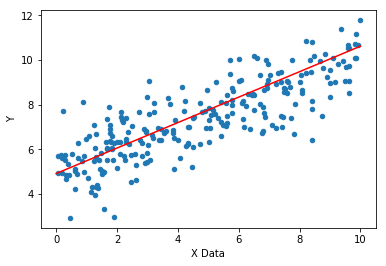

In [21]:
#imports
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

#data
x_data = np.linspace(0.0,10.0,1000000)
noise = 5 + np.random.randn(len(x_data))
y_true =  (0.5 * x_data ) + noise

#graph
batch_size = 8
m = tf.Variable(0.5)
b = tf.Variable(1.0)
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])
y_model = m*xph + b

#optimizer
error = tf.reduce_sum(tf.square(yph-y_model))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

#session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    epochs = 1000
    for i in range(epochs):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m,model_b = sess.run([m,b])

#results
y_hat = x_data * model_m + model_b 
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')